Exetcise 2: Random Walk

1D:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

def randomwalk1D(n):
    x, y = 0, 0

    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]

    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):

        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1

        # Keep track of the positions
        positions.append(y)

    return timepoints, positions

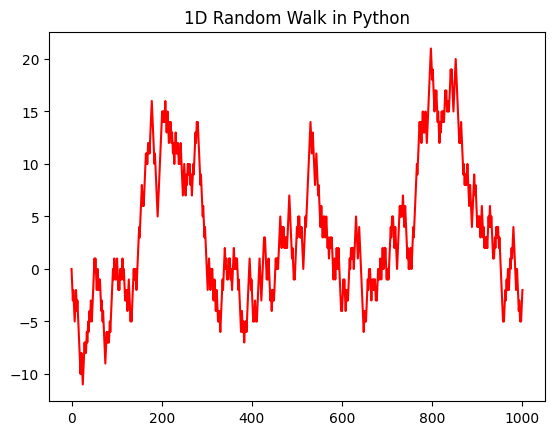

In [58]:
time_data, pos_data = randomwalk1D(1000)

plt.plot(time_data, pos_data, 'r-')
plt.title("1D Random Walk in Python")
plt.show()

multiple results:

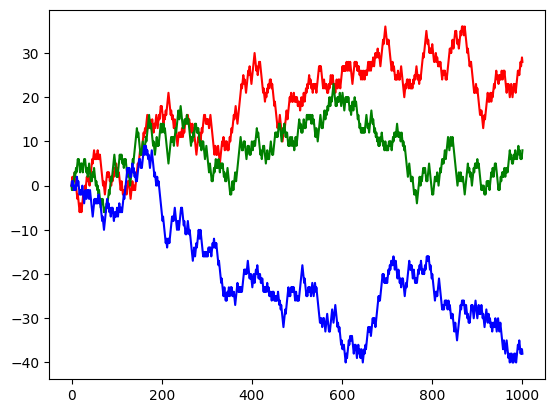

In [17]:
rw1 = randomwalk1D(1000)
rw2 = randomwalk1D(1000)
rw3 = randomwalk1D(1000)

plt.plot(rw1[0], rw1[1], 'r-', label="rw1")
plt.plot(rw2[0], rw2[1], 'g-', label="rw2")
plt.plot(rw3[0], rw3[1], 'b-', label="rw3")

plt.show()

2D

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

def randomwalk2D(n):
    x = np.zeros(n)
    y = np.zeros(n)

    

    directions = ["UP", "DOWN", "LEFT", "RIGHT"]
    for i in range(1, n):

        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            x[i] = x[i-1] 
            y[i] = y[i-1] + 1
        elif step == "DOWN":
            x[i] = x[i-1] 
            y[i] = y[i-1] - 1
        elif step == "LEFT":
            x[i] = x[i-1] - 1
            y[i] = y[i-1] 
        elif step == "RIGHT":
            x[i] = x[i-1] + 1
            y[i] = y[i-1]

        # Keep track of the positions

    return x, y
 

Plot 2D

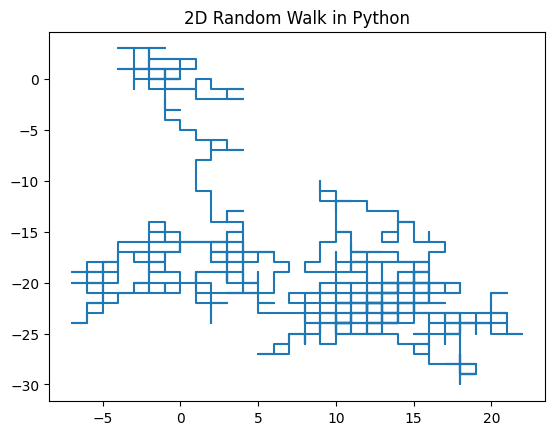

In [29]:
x_data, y_data = randomwalk2D(1000)

plt.title("2D Random Walk in Python")
plt.plot(x_data, y_data)
plt.show()

Multiple results

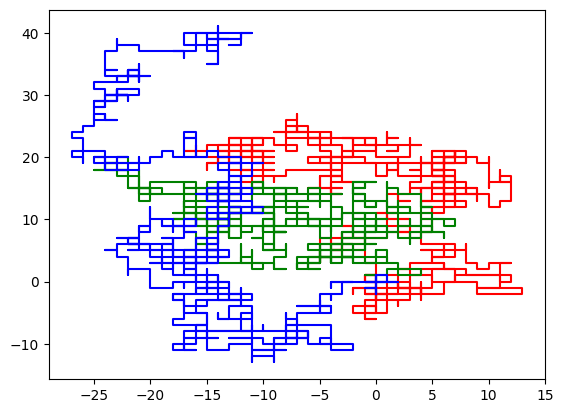

In [62]:
x1, y1 = randomwalk2D(1000)
x2, y2 = randomwalk2D(1000)
x3, y3 = randomwalk2D(1000)

plt.plot(x1, y1, 'r-', label="rw1")
plt.plot(x2, y2, 'g-', label="rw2")
plt.plot(x3, y3 , 'b-', label="rw3")

plt.show()

Theoretical for 1D Random Walk

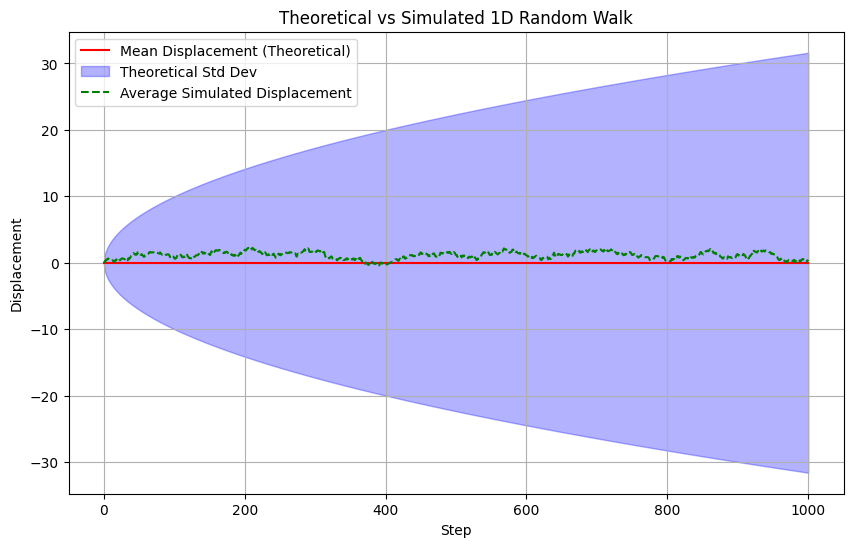

In [64]:
def theoretical_1D(n_steps):
    steps = np.arange(0, n_steps + 1)
    mean_displacement = np.zeros_like(steps)
    std_displacement = np.sqrt(steps)

    # Simulate multiple random walks
    all_walks = [randomwalk1D(n_steps)[1] for _ in range(50)]
    avg_positions = np.mean(all_walks, axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(steps, mean_displacement, label="Mean Displacement (Theoretical)", color="red")
    plt.fill_between(steps, -std_displacement, std_displacement, color="blue", alpha=0.3, label="Theoretical Std Dev")
    plt.plot(steps, avg_positions, label="Average Simulated Displacement", color="green", linestyle="--")
    plt.title("Theoretical vs Simulated 1D Random Walk")
    plt.xlabel("Step")
    plt.ylabel("Displacement")
    plt.legend()
    plt.grid(True)
    plt.show()

theoretical_1D(1000)


Theoretical 2D Random Walk

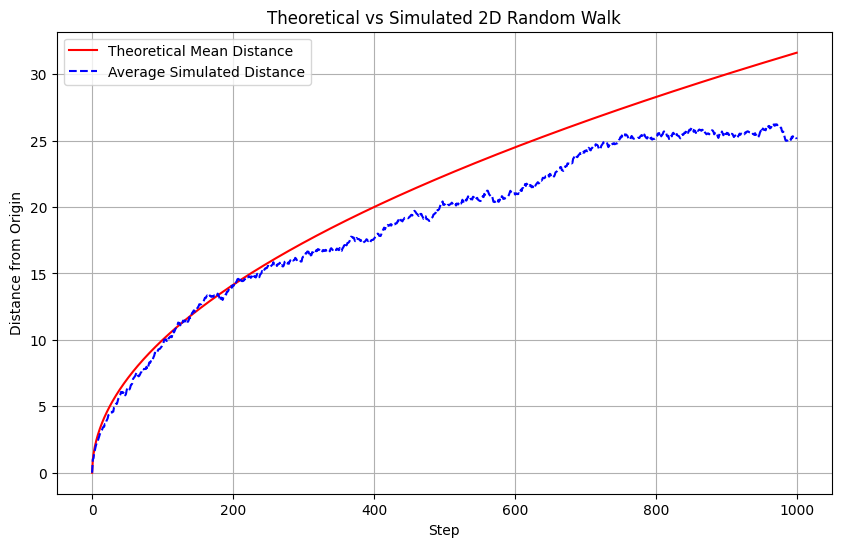

In [42]:
def theoretical_2D(n_steps):
    steps = np.arange(0, n_steps)
    mean_distance = np.sqrt(steps)

    # Simulate multiple random walks
    all_distances = []
    for _ in range(50):
        x, y = randomwalk2D(n_steps)
        distances = np.sqrt(x**2 + y**2)
        all_distances.append(distances)
    avg_distances = np.mean(all_distances, axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(steps, mean_distance, label="Theoretical Mean Distance", color="red")
    plt.plot(steps, avg_distances, label="Average Simulated Distance", color="blue", linestyle="--")
    plt.title("Theoretical vs Simulated 2D Random Walk")
    plt.xlabel("Step")
    plt.ylabel("Distance from Origin")
    plt.legend()
    plt.grid(True)
    plt.show()

theoretical_2D(1000)


Biased walk

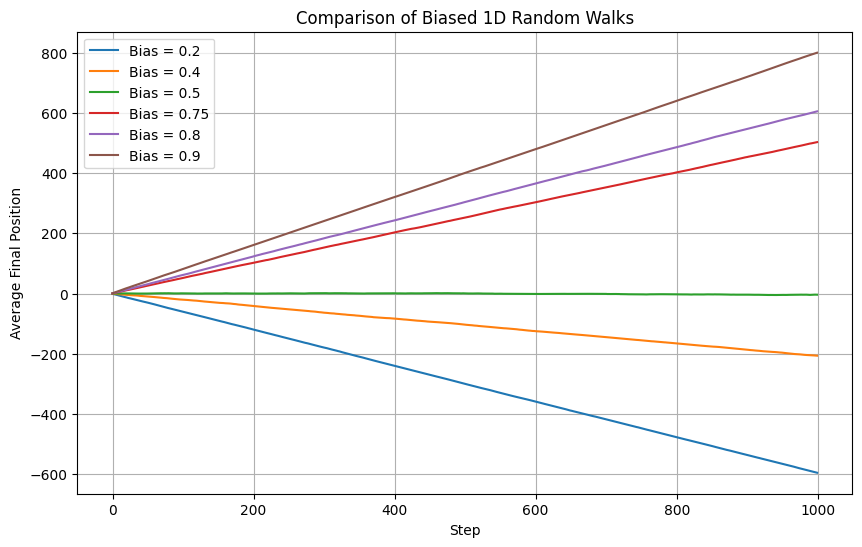

In [66]:
def biased_1d_walk(n_steps, bias):
    steps = np.random.choice([-1, 1], size=n_steps, p=[1-bias, bias])
    positions = np.cumsum(steps)
    return positions
# Compare biases
biases = [0.2, 0.4, 0.5,  0.75, 0.8, 0.9]  # Include unbiased case (0.5)
plt.figure(figsize=(10, 6))
for bias in biases:
    all_walks = [biased_1d_walk(1000, bias) for _ in range(100)]
    avg_positions = np.mean(all_walks, axis=0)
    plt.plot(avg_positions, label=f"Bias = {bias}")

plt.title("Comparison of Biased 1D Random Walks")
plt.xlabel("Step")
plt.ylabel("Average Final Position")
plt.legend()
plt.grid(True)
plt.show()
